In [2]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.formula.api as smf
import numpy as np


In [15]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
salary_data=pd.read_csv(r"C:\Users\chana\Downloads\Salary_Data.csv")
salary_data

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


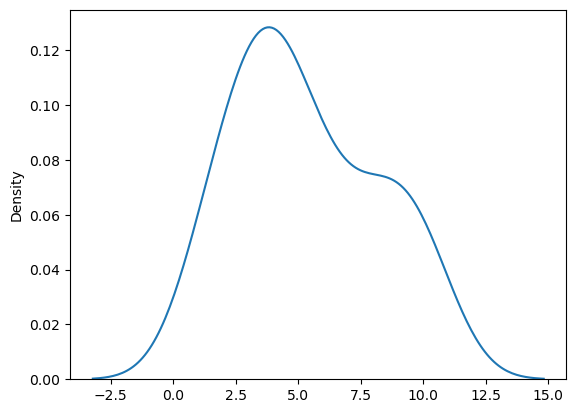

In [16]:
sns.distplot(x=salary_data['YearsExperience'],hist=False)
plt.show()

In [17]:
salary_data['YearsExperience'].skew()

0.37956024064804106

In [19]:
salary_data['YearsExperience'].kurtosis()

-1.0122119403325072

<Axes: xlabel='YearsExperience', ylabel='Salary'>

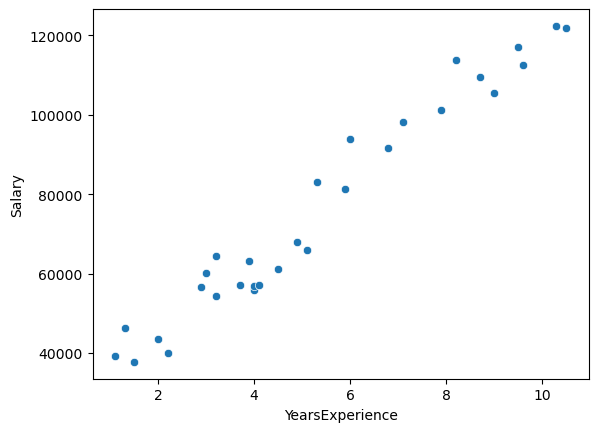

In [9]:
sns.scatterplot(x='YearsExperience',y='Salary',data=salary_data)

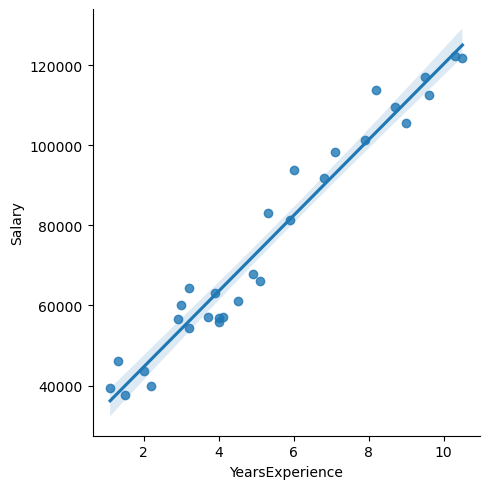

In [20]:
sns.lmplot(x='YearsExperience',y='Salary',data=salary_data)

In [21]:
#model building
model=smf.ols('Salary~YearsExperience',data=salary_data).fit()

In [22]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [23]:
model.rsquared , model.rsquared_adj , model.aic , model.bic

(0.9569566641435086, 0.9554194021486339, 606.882316930432, 609.6847116937563)

In [24]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

In [25]:
test=pd.DataFrame({'YearsExperience':[4,5,6]})

In [26]:
test

,YearsExperience
0,4
1,5
2,6


In [27]:
model.predict(test)

0    63592.049484
1    73042.011806
2    82491.974127
dtype: float64

# problem 2

In [28]:
delivery=pd.read_csv(r"C:\Users\chana\Downloads\delivery_time.csv")
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


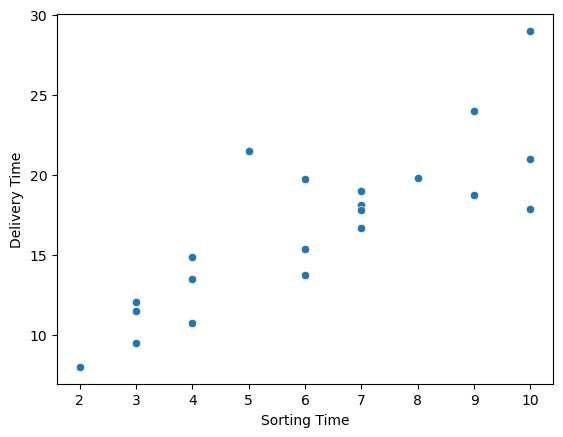

In [29]:
sns.scatterplot(x='Sorting Time',y='Delivery Time',data=delivery)
plt.show()

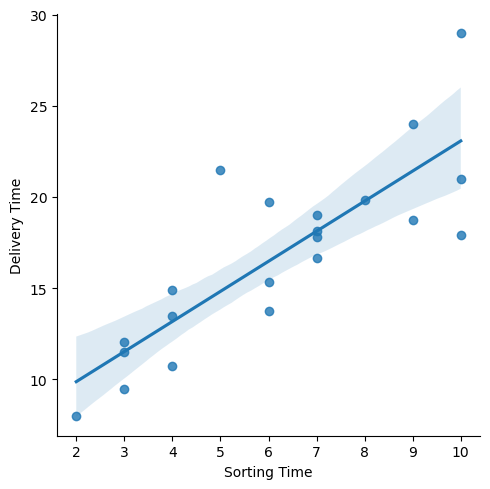

In [30]:
sns.lmplot(x='Sorting Time',y='Delivery Time',data=delivery)
plt.show()

<Axes: ylabel='Density'>

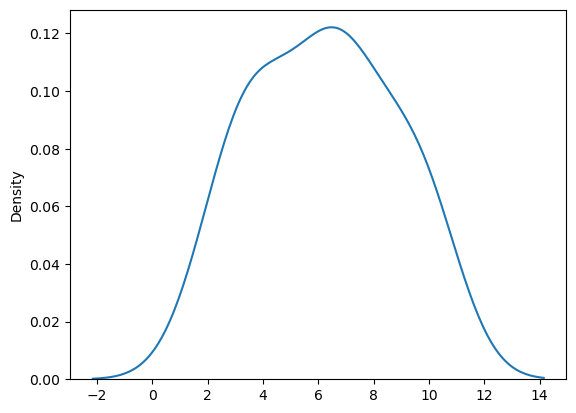

In [34]:
sns.distplot(x=delivery['Sorting Time'],hist=False)

In [40]:
X=delivery[['Sorting Time']]
y=delivery[['Delivery Time']]


In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
model2=LinearRegression()

In [41]:
model2.fit(X,y)

LinearRegression()

In [43]:
model2.

<bound method BaseEstimator.get_params of LinearRegression()>

In [47]:
test2=pd.DataFrame({'Sorting Time':[4,5,6,8]})

In [48]:
model2.predict(test2)

array([[13.17881356],
       [14.82783346],
       [16.47685335],
       [19.77489315]])

In [49]:
model2.intercept_

array([6.58273397])

In [50]:
model2.coef_

array([[1.6490199]])

# Multiple linear regression

In [57]:
toyota=pd.read_csv("ToyotaCorolla.csv",encoding='latin1')
toyota.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [73]:
toyota2=toyota[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]

In [74]:
toyota2.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [69]:
toyota2.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [82]:
toyota3=toyota2.drop_duplicates()

In [83]:
toyota3.shape

(1435, 9)

In [75]:
toyota2[toyota2.duplicated()]

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
113,24950,8,13253,116,2000,5,5,234,1320


In [84]:
toyota3.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [78]:
import pandas_profiling as pp

In [85]:
toyota3_profiling=pp.ProfileReport(toyota3)

In [86]:
toyota3_profiling.to_file('toyota3_profile.html')

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]